Author : Mohamed Elafifi

Student ID : 22066939

In [1]:
import csv
import pandas as pd
full_data = pd.read_csv('cities.csv')
full_data

,City,X,Y
0,City_1,37.454012,95.071431
1,City_2,73.199394,59.865848
2,City_3,15.601864,15.599452
3,City_4,5.808361,86.617615
4,City_5,60.111501,70.807258
5,City_6,2.058449,96.990985
6,City_7,83.244264,21.233911
7,City_8,18.182497,18.340451
8,City_9,30.424224,52.475643
9,City_10,43.194502,29.122914


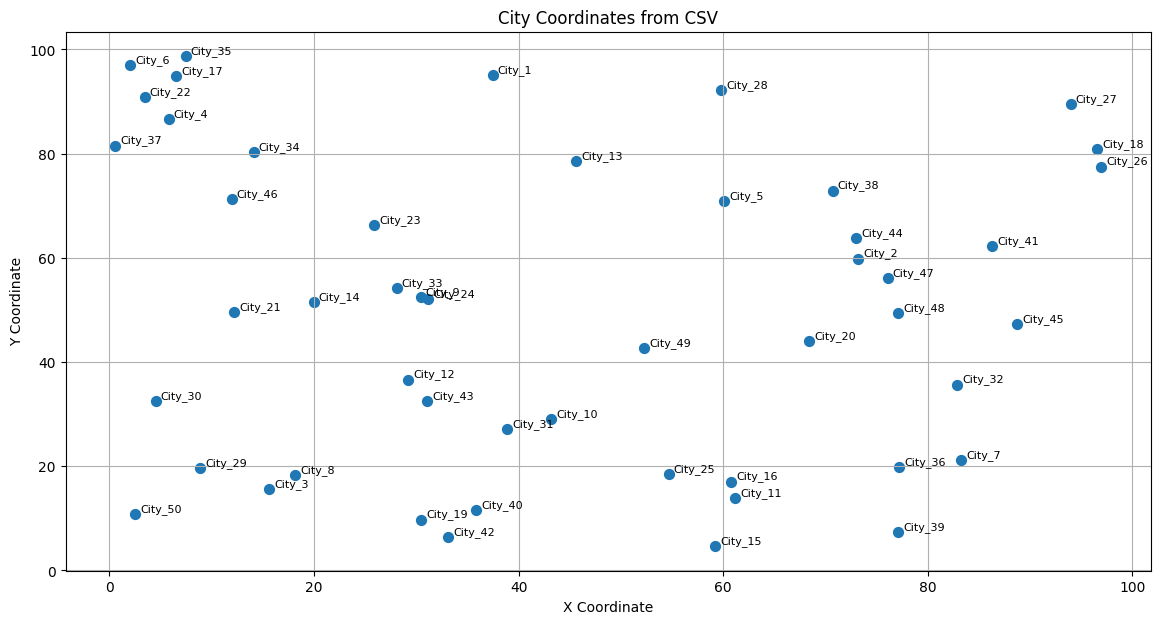

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))

plt.scatter(full_data["X"], full_data["Y"], s=50)

for i, row in full_data.iterrows():
    plt.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize = 8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("City Coordinates from CSV")
plt.grid(True)
plt.show()

GENETIC ALGORITHM - TSP RESULTS

Starting City (auto-chosen best): City_20
Number of cities visited: 50
Final Distance: 602.52
Execution Time: 60.6560 seconds

ALGORITHM METRICS
Initial Best Distance: 2240.03
Final Best Distance: 602.52
Total Improvement: 73.10%
Number of Improvements: 100
Convergence Generation: 1626
Total Evaluations: 400000
Final Stagnant Generations: 374

TIME COMPLEXITY ANALYSIS
Population Size (P): 200
Generations (G): 2000
Number of Cities (N): 50

Theoretical Complexity: O(G × P × N²)
Estimated Operations: 2000 × 200 × 50² = 1,000,000,000
Actual Time per Operation: 0.151640 ms

ROUTE DETAILS
Route: City_20 → City_44 → City_38 → City_5 → City_1 → City_35 → City_17 → City_6 → City_22 → City_4 → City_37 → City_34 → City_46 → City_21 → City_14 → City_24 → City_9 → City_33 → City_23 → City_13 → City_28 → City_27 → City_18 → City_26 → City_41 → City_2 → City_47 → City_48 → City_45 → City_32 → City_7 → City_36 → City_39 → City_15 → City_11 → City_16 → City_25 → City_4

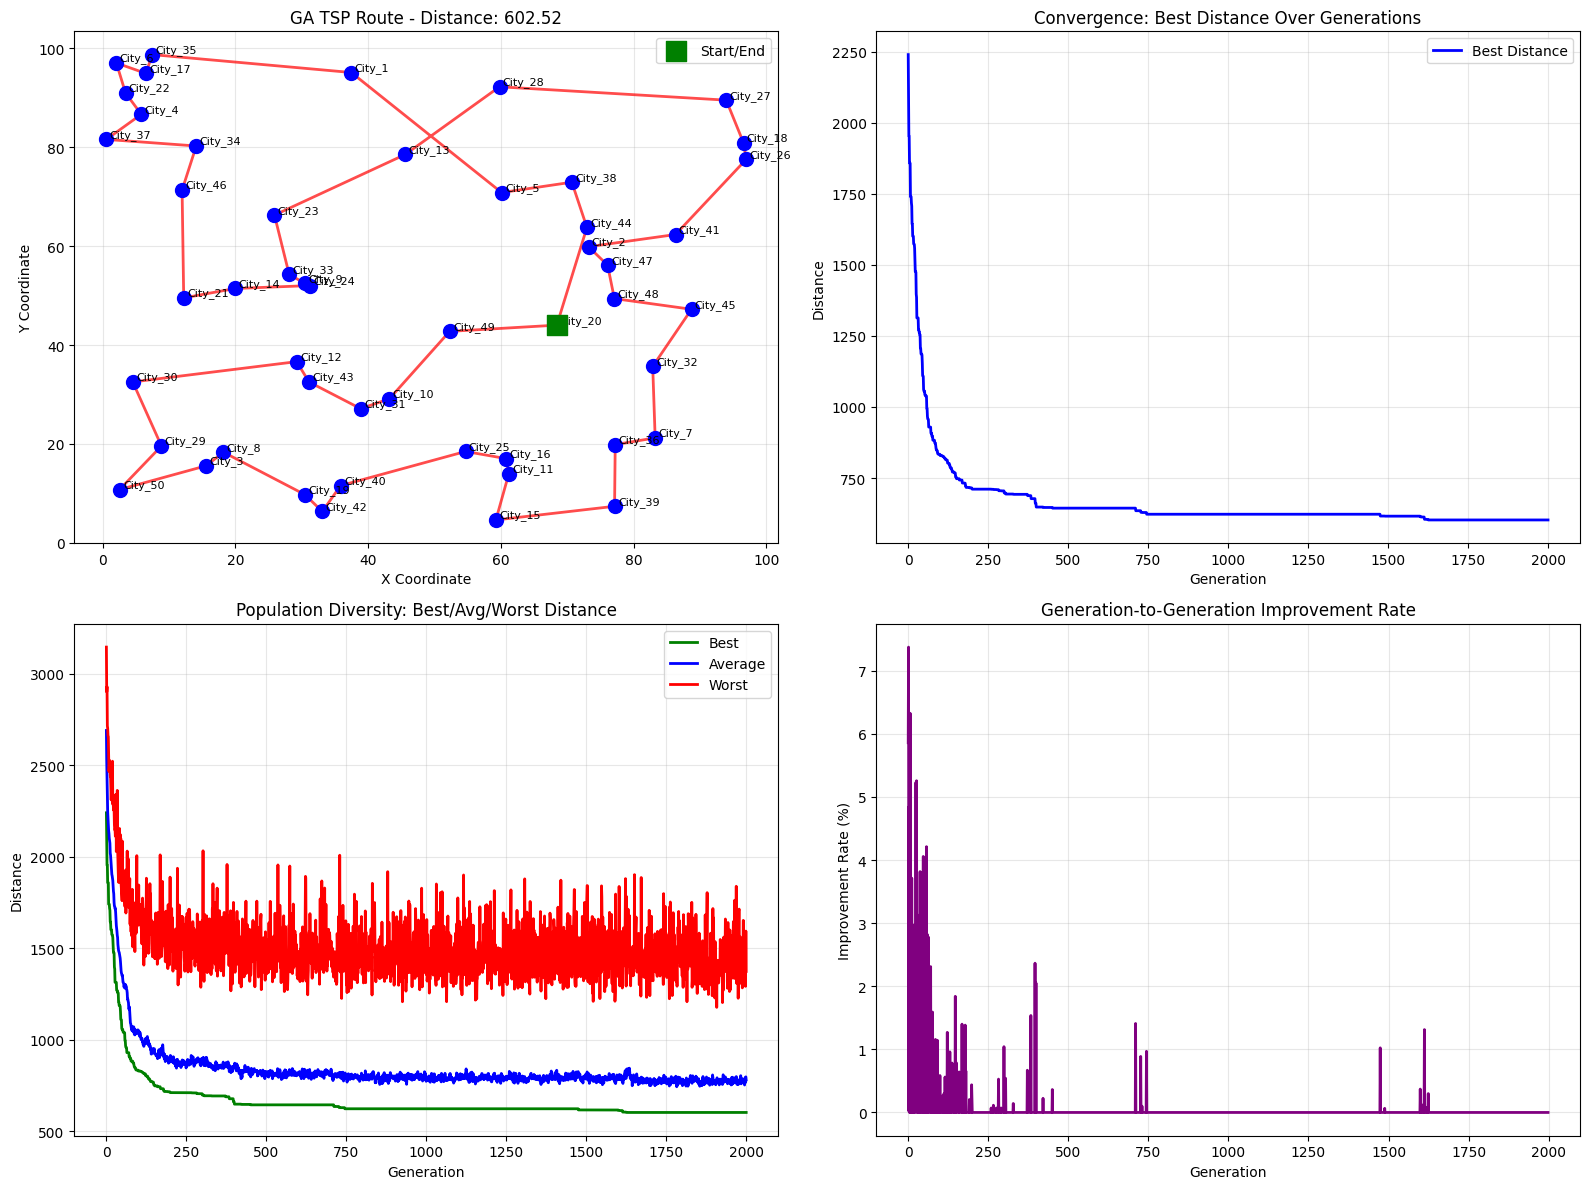

In [8]:
import random
import math
import numpy as np
import time

def calculate_distance(route):
    """
    Calculate the total Euclidean distance of a route including return to start.
    """
    route_extended = np.append(route, [route[0]], axis=0)
    return np.sum(np.sqrt(np.sum(np.diff(route_extended, axis=0)**2, axis=1)))

def create_initial_population(pop_size, num_cities):
    """
    Generate initial population of random routes for genetic algorithm.
    """
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

def calculate_fitness(route, cities):
    """
    Calculate fitness as inverse of route distance (shorter = fitter).
    """
    distance = calculate_distance(cities[route])
    return 1 / distance

def selection(population, cities, tournament_size=5):
    """
    Select parent using tournament selection (best of random sample).
    """
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda route: calculate_fitness(route, cities))

def crossover(parent1, parent2):
    """
    Create child route using order crossover (preserve subsequence from parent1).
    """
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]
    
    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = city
    
    return child

def mutate(route, mutation_rate=0.01):
    """
    Randomly swap cities in route based on mutation rate.
    """
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

def create_nearest_neighbor_route(cities, start_index=0):
    """
    Create route using greedy nearest neighbor heuristic from given start city.
    """
    n = len(cities)
    unvisited = set(range(n))
    route = [start_index]
    unvisited.remove(start_index)

    while unvisited:
        last = route[-1]
        next_city = min(
            unvisited,
            key=lambda j: np.linalg.norm(cities[last] - cities[j])
        )
        route.append(next_city)
        unvisited.remove(next_city)

    return route

def best_nearest_neighbor_route(cities):
    """
    Find best starting city by trying nearest neighbor from all cities.
    """
    n = len(cities)
    best_distance = math.inf
    best_route = None
    best_start = None

    for start_index in range(n):
        route = create_nearest_neighbor_route(cities, start_index=start_index)
        distance = calculate_distance(cities[route])

        if distance < best_distance:
            best_distance = distance
            best_route = route
            best_start = start_index

    return best_start, best_route, best_distance

def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, start_index=None):
    """
    Solve TSP using genetic algorithm with elitism, tournament selection, and order crossover.
    Returns route, distance, start_index, and metrics dictionary.
    """
    num_cities = len(cities)
    
    # Metrics tracking
    metrics = {
        'best_distances': [],
        'avg_distances': [],
        'worst_distances': [],
        'improvements': 0,
        'stagnant_generations': 0,
        'total_evaluations': 0
    }
    
    if start_index is None:
        start_index, _, _ = best_nearest_neighbor_route(cities)
    
    population = create_initial_population(pop_size, num_cities)
    
    best_route = None
    best_distance = float('inf')
    previous_best = float('inf')
    
    for gen in range(generations):
        # Calculate all distances for metrics
        distances = [calculate_distance(cities[route]) for route in population]
        metrics['total_evaluations'] += len(distances)
        
        # Track best, average, worst
        current_best = min(distances)
        metrics['best_distances'].append(current_best)
        metrics['avg_distances'].append(np.mean(distances))
        metrics['worst_distances'].append(max(distances))
        
        # Find best route in current generation
        current_best_route = population[distances.index(current_best)]
        
        if current_best < best_distance:
            best_route = current_best_route.copy()
            best_distance = current_best
            metrics['improvements'] += 1
            metrics['stagnant_generations'] = 0
        else:
            metrics['stagnant_generations'] += 1
        
        # Create new population
        new_population = []
        
        # Elitism: keep best route
        new_population.append(best_route.copy())
        
        while len(new_population) < pop_size:
            parent1 = selection(population, cities)
            parent2 = selection(population, cities)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        
        population = new_population
    
    # Final metrics
    metrics['final_improvement'] = ((metrics['best_distances'][0] - best_distance) / metrics['best_distances'][0]) * 100
    metrics['convergence_generation'] = len(metrics['best_distances']) - metrics['stagnant_generations']
    
    # Rotate route to start with the specified city
    start_pos = best_route.index(start_index)
    best_route = best_route[start_pos:] + best_route[:start_pos]
    
    return best_route, best_distance, start_index, metrics


# Parameters
pop_size = 200
generations = 2000
mutation_rate = 0.02
random.seed(42)

start_city_idx = 0
end_city_idx = 49
num_cities_to_visit = 50

city_indices = list(range(start_city_idx, end_city_idx + 1))

if len(city_indices) > num_cities_to_visit:
    middle_cities = city_indices[1:-1]
    random.shuffle(middle_cities)
    selected_middle = middle_cities[:num_cities_to_visit - 2]
    city_indices = [city_indices[0]] + selected_middle + [city_indices[-1]]
else:
    city_indices = city_indices[:num_cities_to_visit]

subset_data = full_data.iloc[city_indices].reset_index(drop=True)
cities = subset_data[["X", "Y"]].values

# Run algorithm with timing
start_time = time.time()
ga_route, ga_distance, chosen_start_index, metrics = genetic_algorithm(
    cities, pop_size=pop_size, generations=generations, mutation_rate=mutation_rate, start_index=None
)
end_time = time.time()
execution_time = end_time - start_time

original_route = [city_indices[i] for i in ga_route]

start_city = subset_data.iloc[ga_route[0]]['City']

# Print comprehensive metrics
print("=" * 60)
print("GENETIC ALGORITHM - TSP RESULTS")
print("=" * 60)
print(f"\nStarting City (auto-chosen best): {start_city}")
print(f"Number of cities visited: {len(ga_route)}")
print(f"Final Distance: {ga_distance:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")

print("\n" + "=" * 60)
print("ALGORITHM METRICS")
print("=" * 60)
print(f"Initial Best Distance: {metrics['best_distances'][0]:.2f}")
print(f"Final Best Distance: {ga_distance:.2f}")
print(f"Total Improvement: {metrics['final_improvement']:.2f}%")
print(f"Number of Improvements: {metrics['improvements']}")
print(f"Convergence Generation: {metrics['convergence_generation']}")
print(f"Total Evaluations: {metrics['total_evaluations']}")
print(f"Final Stagnant Generations: {metrics['stagnant_generations']}")

print("\n" + "=" * 60)
print("TIME COMPLEXITY ANALYSIS")
print("=" * 60)
print(f"Population Size (P): {pop_size}")
print(f"Generations (G): {generations}")
print(f"Number of Cities (N): {len(ga_route)}")
print(f"\nTheoretical Complexity: O(G × P × N²)")
print(f"Estimated Operations: {generations} × {pop_size} × {len(ga_route)}² = {generations * pop_size * len(ga_route)**2:,}")
print(f"Actual Time per Operation: {(execution_time / metrics['total_evaluations']) * 1000:.6f} ms")

print("\n" + "=" * 60)
print("ROUTE DETAILS")
print("=" * 60)
route_names = [subset_data.iloc[i]['City'] for i in ga_route]
print(f"Route: {' → '.join(route_names)} → {route_names[0]}")

# Visualization with metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Route visualization
ax1 = axes[0, 0]
ax1.scatter(subset_data["X"], subset_data["Y"], s=100, c='blue', zorder=3)
for i, row in subset_data.iterrows():
    ax1.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize=8)
route_coords = cities[ga_route]
route_coords = np.append(route_coords, [route_coords[0]], axis=0)
ax1.plot(route_coords[:, 0], route_coords[:, 1], 'r-', linewidth=2, alpha=0.7, zorder=2)
start_coords = cities[ga_route[0]]
ax1.scatter(start_coords[0], start_coords[1], s=200, c='green', marker='s', zorder=4, label='Start/End')
ax1.set_xlabel("X Coordinate")
ax1.set_ylabel("Y Coordinate")
ax1.set_title(f"GA TSP Route - Distance: {ga_distance:.2f}")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Best distance over generations
ax2 = axes[0, 1]
ax2.plot(metrics['best_distances'], 'b-', linewidth=2, label='Best Distance')
ax2.set_xlabel("Generation")
ax2.set_ylabel("Distance")
ax2.set_title("Convergence: Best Distance Over Generations")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Average and worst distance
ax3 = axes[1, 0]
ax3.plot(metrics['best_distances'], 'g-', linewidth=2, label='Best')
ax3.plot(metrics['avg_distances'], 'b-', linewidth=2, label='Average')
ax3.plot(metrics['worst_distances'], 'r-', linewidth=2, label='Worst')
ax3.set_xlabel("Generation")
ax3.set_ylabel("Distance")
ax3.set_title("Population Diversity: Best/Avg/Worst Distance")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Improvement rate
ax4 = axes[1, 1]
improvement_rate = []
for i in range(1, len(metrics['best_distances'])):
    if metrics['best_distances'][i-1] > 0:
        imp = ((metrics['best_distances'][i-1] - metrics['best_distances'][i]) / metrics['best_distances'][i-1]) * 100
        improvement_rate.append(max(0, imp))
    else:
        improvement_rate.append(0)
ax4.plot(improvement_rate, 'purple', linewidth=2)
ax4.set_xlabel("Generation")
ax4.set_ylabel("Improvement Rate (%)")
ax4.set_title("Generation-to-Generation Improvement Rate")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()